In [22]:
%matplotlib inline

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [26]:
data = pd.read_csv('data/merged_data_cleaned.csv')

In [27]:
data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [7]:
n_observations = data.shape[0]
n_features = data.shape[1]

numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(exclude=['number']).columns.tolist()

print(f"Number of observations: {n_observations}")
print(f"Number of features: {n_features}")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Number of observations: 1339
Number of features: 43
Numerical features: ['numberofbags', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'cleancup', 'sweetness', 'cupperpoints', 'totalcuppoints', 'moisture', 'categoryonedefects', 'quakers', 'categorytwodefects', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']
Categorical features: ['species', 'owner', 'countryoforigin', 'farmname', 'lotnumber', 'mill', 'iconumber', 'company', 'altitude', 'region', 'producer', 'bagweight', 'incountrypartner', 'harvestyear', 'gradingdate', 'owner1', 'variety', 'processingmethod', 'color', 'expiration', 'certificationbody', 'certificationaddress', 'certificationcontact', 'unit_of_measurement']


### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [8]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '').str.replace('__', '_')

data.columns

Index(['species', 'owner', 'countryoforigin', 'farmname', 'lotnumber', 'mill',
       'iconumber', 'company', 'altitude', 'region', 'producer',
       'numberofbags', 'bagweight', 'incountrypartner', 'harvestyear',
       'gradingdate', 'owner1', 'variety', 'processingmethod', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'cleancup', 'sweetness', 'cupperpoints', 'totalcuppoints', 'moisture',
       'categoryonedefects', 'quakers', 'color', 'categorytwodefects',
       'expiration', 'certificationbody', 'certificationaddress',
       'certificationcontact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [38]:
print(data['Number.of.Bags'].unique())

def convert_bag_weight(weight):
    if pd.isnull(weight):
        return weight
    weight = weight.lower().replace(' ', '')
    if 'lbs' in weight:
        lbs_value = float(weight.replace('lbs', ''))
        return round(lbs_value * 0.453592, 2)
    elif 'kg' in weight:
        return float(weight.replace('kg', ''))
    else:
        return None

[ 300    5  320  100   50   10    1  150    3  250   14  275   20   29
   25   53   12    7   80   37  280   19    8   16    2   36  360   54
   13   27  200  135  170   38   31   15  243  252  134    4  120  235
  125   66   75   11   35   56  304   69  230  248   65  377  130  305
  138  270   45  226   48  167  175   18  285   33  245  180  600  500
   39    6  220   26   30  232   84   90  310  325   17  121   23  129
   40   32   21   60   93   77  288  198   70   42   28   43   49   74
   51    0   44 1062  149  274  114  450   62  166   24  302   58  165
  550  123  240  160   94  440   22  256  400   82  209  380  253  223
  127  202    9   85  140]


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [93]:
def clean_harvest_year(year):
    if pd.isnull(year):
        return None
    
    year = str(year).strip()
    
    if '-' in year:
        years = re.findall(r'\d{4}', year)
        return int(years[0]) if years else None
    # If the year contains a 4-digit year, extract it
    elif re.search(r'\d{4}', year):
        return int(re.search(r'\d{4}', year).group())
    else:
        return None

data['Harvest.Year'] = data['Harvest.Year'].apply(clean_harvest_year)

print(data['Harvest.Year'].unique())

print(data[['Harvest.Year']].head())

print(data['Harvest.Year'].describe())

[2014.   nan 2013. 2012. 2010. 2009. 2015. 2011. 2016. 2017. 2018. 7201.]
   Harvest.Year
0        2014.0
1        2014.0
2           NaN
3        2014.0
4        2014.0
count    1276.000000
mean     2017.644984
std       145.231024
min      2009.000000
25%      2012.000000
50%      2013.000000
75%      2015.000000
max      7201.000000
Name: Harvest.Year, dtype: float64


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [85]:
unknown_countries_count = data['Country.of.Origin'].isnull().sum()

print(f"Number of coffees with unknown country of origin: {unknown_countries_count}")

data_dropped = data.dropna(subset=['Country.of.Origin'])

remaining_rows = data_dropped.shape[0]
print(f"Remaining rows after dropping unknown countries: {remaining_rows}")

remaining_unknowns = data['Country.of.Origin'].isnull().sum()
print(f"Remaining unknown countries after imputation: {remaining_unknowns}")

data_cleaned = data.dropna(subset=['Country.of.Origin'])
print(f"Missing values in country_of_origin after cleaning: {data_cleaned['Country.of.Origin'].isnull().sum()}")

Number of coffees with unknown country of origin: 1
Remaining rows after dropping unknown countries: 1338
Remaining unknown countries after imputation: 1
Missing values in country_of_origin after cleaning: 0


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [66]:
print(data['Owner'].unique())

print(data[['Owner', 'Producer']].head())

['metad plc' 'grounds for health admin' 'yidnekachew dabessa' 'ji-ae ahn'
 'hugo valdivia' 'ethiopia commodity exchange' 'diamond enterprise plc'
 'mohammed lalo' 'cqi q coffee sample representative'
 'yunnan coffee exchange' 'essencecoffee' 'the coffee source inc.'
 'roberto licona franco' 'nucoffee' 'kabum trading company'
 'bismarck castro' 'lin, che-hao krude 林哲豪' 'nora zeas'
 'specialty coffee-korea' 'francisco a mena' 'hider abamecha'
 'daniel magu' 'kona pacific farmers cooperative' 'itdp international'
 'jacques pereira carneiro' 'jungle estate' 'great lakes coffee uganda'
 'lusso lab' 'afca' 'juan luis alvarado romero' 'kawacom uganda ltd'
 'exportadora de cafe condor s.a' 'gonzalo hernandez'
 'ibrahim hussien speciality coffee producer &export'
 'seid damtew coffee planataion' 'dane loraas' 'colbran coffeelands, ltd.'
 'atlantic specialty coffee' 'assefa belay coffee producer'
 'kyagalanyi ltd' 'rashid moledina & co. (msa) ltd.' 'ibero kenya limited'
 'compañia colombiana agr

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [79]:
color_by_country = data.pivot_table(
    index='Country.of.Origin',
    columns='Color',
    aggfunc='size',
    fill_value=0
).reset_index()

color_by_country

Color,Country.of.Origin,Blue-Green,Bluish-Green,Green
0,Brazil,14,12,92
1,Burundi,0,0,1
2,China,0,0,16
3,Colombia,8,8,118
4,Costa Rica,10,9,28
5,Cote d?Ivoire,0,1,0
6,Ecuador,2,1,0
7,El Salvador,2,2,9
8,Ethiopia,0,2,15
9,Guatemala,2,7,159


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

Means:
Aroma            7.566706
Flavor           7.520426
Aftertaste       7.401083
Acidity          7.535706
Body             7.517498
Balance          7.518013
Uniformity       9.834877
Clean.Cup        9.835108
Sweetness        9.856692
Cupper.Points    7.503376
Moisture         0.088379
dtype: float64

Ranges:
Aroma             8.75
Flavor            8.83
Aftertaste        8.67
Acidity           8.75
Body              8.58
Balance           8.75
Uniformity       10.00
Clean.Cup        10.00
Sweetness        10.00
Cupper.Points    10.00
Moisture          0.28
dtype: float64


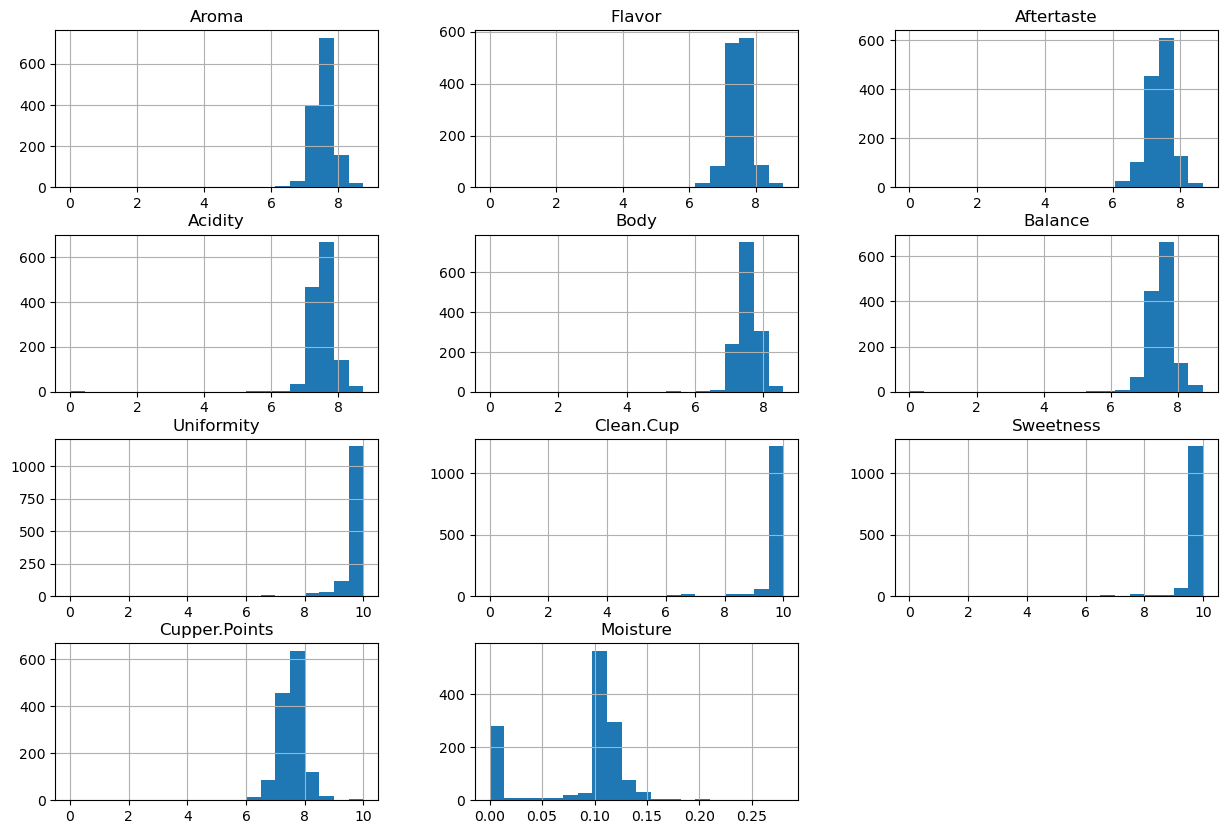

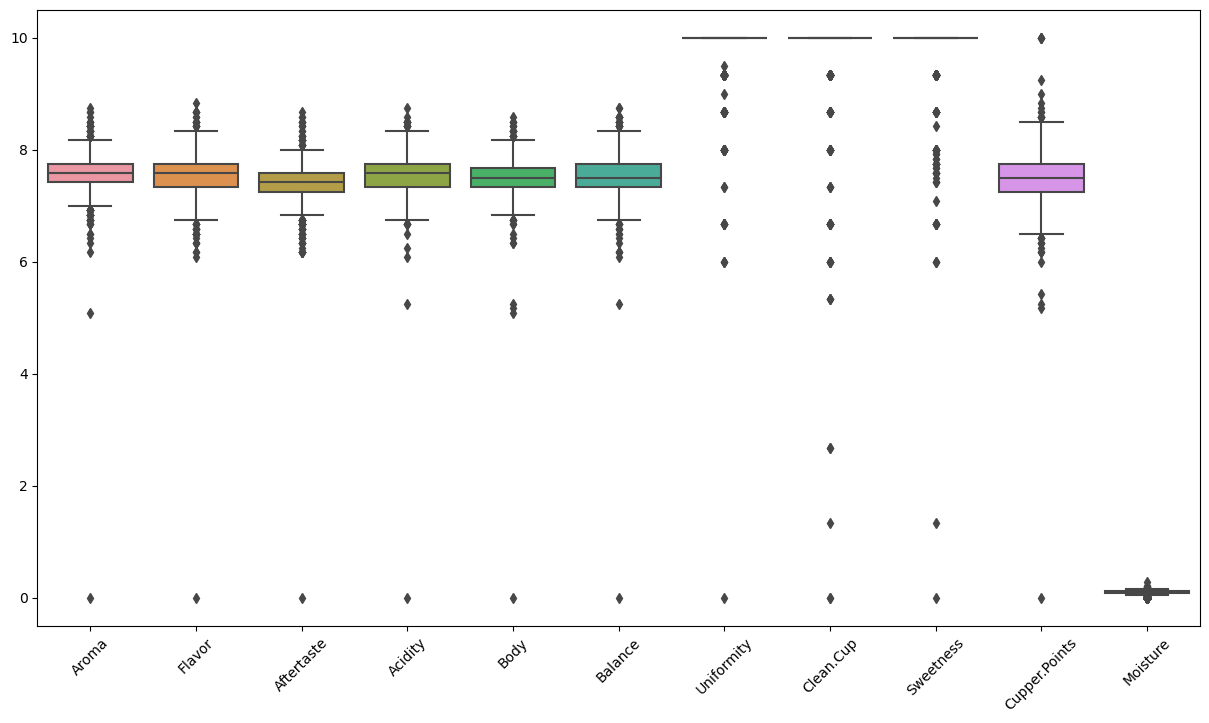

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select rating columns
rating_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture']

# Calculate means and ranges
means = data[rating_columns].mean()
ranges = data[rating_columns].max() - data[rating_columns].min()

print("Means:")
print(means)

print("\nRanges:")
print(ranges)

# Plot histograms
data[rating_columns].hist(bins=20, figsize=(15, 10))
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[rating_columns])
plt.xticks(rotation=45)
plt.show()


### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [76]:
country_region_check = data.groupby(['Country.of.Origin', 'Region']).size()

print(country_region_check)

print(data['Altitude'].describe())

Country.of.Origin  Region                   
Brazil             alta paulista (sao paulo)     1
                   brazil matas de minas         1
                   campos altos - cerrado        4
                   carmo de minas                2
                   cerrado                      12
                                                ..
Vietnam            don duong                     2
                   vietnam                       1
                   vietnam cau dat               1
                   vietnam tutra                 1
Zambia             mubuyu estate                 1
Length: 362, dtype: int64
count     1113
unique     396
top       1100
freq        43
Name: Altitude, dtype: object


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!